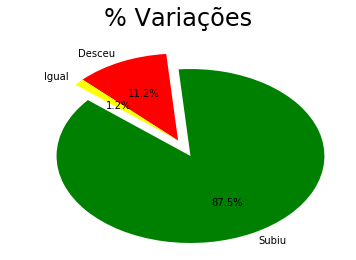

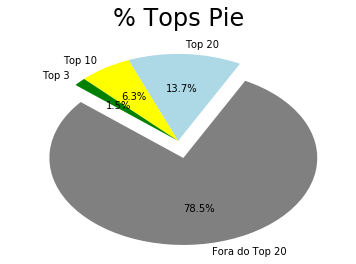

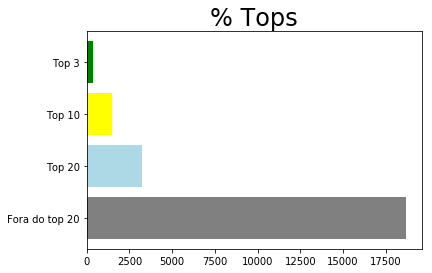

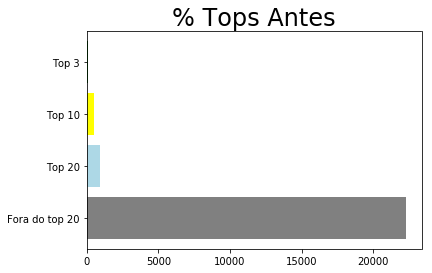

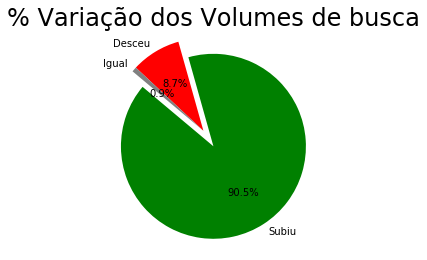

In [5]:
# ANÁLISE DE VARIAÇÃO DE POSICIONAMENTO 


# Baixar do SemRush planilhas com as palavras-chave do domínio que quiser em 2 períodos diferentes (download feito FORA do projeto); 
# Um deles deve ser o Arquivo "Histórico", com dados de um período já passado;
# O outro é do presente momento, tratado aqui como Arquivo "Atual";
# Na janela "Procurar Arquivos CSV", abrir os arquivos acima em seus devidos lugares;
# Após o upload dos arquivos, esperar a análise acabar e fornecer os devidos gráficos.




# Bibliotecas Usadas
import pandas as pd
import numpy as np
import tkinter as tk
from tkinter.filedialog import askopenfilename
%matplotlib inline
import matplotlib.pyplot as plt



# Criação das funções dos botões
def import_csv_data1():
    global v
    global df
    csv_file_path = askopenfilename()
    ###print(csv_file_path)
    v.set(csv_file_path)
    df = csv_file_path
    
    
    
def import_csv_data2():
    global b
    global db
    csv_file_path2 = askopenfilename()
    ####print(csv_file_path2)
    b.set(csv_file_path2)
    db = csv_file_path2
    
    
# Criação de Janela de Interface
root = tk.Tk()
root.title('Procurar Arquivos CSV')
v = tk.StringVar()
b = tk.StringVar()
entry = tk.Entry(root, textvariable =v).grid(row=0, column=1)
entry2 = tk.Entry(root, textvariable =b).grid(row=1, column=1)
tk.Button(root, text = 'Abrir Arquivo Histórico', command= import_csv_data1, height=1, width=18).grid(row=0, column=0)
tk.Button(root, text = 'Abrir Arquivo Atual', command=import_csv_data2, height=1, width=18).grid(row=1,column=0)

tk.Button(root, text='Analisar', command= root.destroy).grid(row=2, column=1)

root.mainloop()

                

# Função para saber quais palavras-chave subiram, desceram e ficara iguais
def status(x):
        if x > 0:
            return 'Subiu'
        elif x < 0:
            return 'Desceu'
        elif x == 0:
            return 'Igual'
        else:
            return 'Erro'

        
        
# Função para saber em qual TOP cada palavra-chave está   
            
def tops(x):
        if x <= 3:
            return 'Top 3'
        elif x <= 10:
            return 'Top 10'
        elif x <= 20:
            return 'Top 20'
        else:
            return 'Fora do top 20'
               

# Tratar os Dados

antes = pd.read_csv(df)
depois = pd.read_csv(db)
antes_filtro = antes[['Keyword', 'Position']]
depois_filtro = depois[['Keyword','Search Volume', 'Position']]
antes_filtro = antes_filtro.rename(columns={"Position": "Position Before"})
depois_filtro_position_before = depois_filtro.merge(antes_filtro, on = 'Keyword', how = 'left')
x = depois_filtro_position_before[["Keyword","Search Volume","Position","Position Before"]].fillna(101)
x['Variação'] = x['Position Before'] - x['Position']
x['Status'] = x['Variação'].apply(status)
x['Tops'] = x['Position'].apply(tops)
x['Tops Antes'] = x['Position Before'].apply(tops)



# Gráfico 1
plt.pie(x['Status'].value_counts(),explode = (0.2, 0, 0), labels = ['Subiu', 'Desceu', 'Igual'], autopct='%1.1f%%', startangle=140,
    colors = ['green', 'red', 'yellow'])
plt.title('% Variações', fontsize = 24)

plt.show()

# Gráfico 2

plt.pie(x['Tops'].value_counts(),explode = (0.2, 0, 0, 0), labels = ['Fora do Top 20', 'Top 20', 'Top 10', 'Top 3'], autopct='%1.1f%%', startangle=140,
    colors = ['gray', 'lightblue', 'yellow', 'green'])
plt.title('% Tops Pie', fontsize = 24)
print('\n\n\n')
plt.show()

# Gráfico 3
height = x['Tops'].value_counts()
bars = ['Fora do top 20', 'Top 20', 'Top 10', 'Top 3']
y_pos = np.arange(len(bars))

plt.barh(bars, height, color = ['gray', 'lightblue', 'yellow', 'green'])

plt.title('% Tops', fontsize = 24)
print('\n\n\n')
plt.show()


# Gráfico 4
height = x['Tops Antes'].value_counts()
bars = ['Fora do top 20', 'Top 20', 'Top 10', 'Top 3']
y_pos = np.arange(len(bars))

plt.barh(bars, height, color = ['gray', 'lightblue', 'yellow', 'green'])

plt.title('% Tops Antes', fontsize = 24)
print('\n\n\n')
plt.show()



# Gráfico 5
a = x.loc[x['Status'] == 'Subiu'] ['Search Volume'].sum()
b = x.loc[x['Status'] == 'Desceu'] ['Search Volume'].sum()
c = x.loc[x['Status'] == 'Igual'] ['Search Volume'].sum()
labels = 'Subiu', 'Desceu', 'Igual'
volumes = [a, b , c,]
colors = ['green', 'red', 'gray']
explode = (0.2, 0, 0)

plt.pie( volumes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle = 140)
plt.axis('equal')
plt.title('% Variação dos Volumes de busca', fontsize = 24)
print('\n\n\n')
plt.show()

